In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [20]:

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [21]:
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
187,60.0,0,1896,1,25,0,365000.00,2.10,144,0,0,172,1
113,70.0,1,143,0,60,0,351000.00,1.30,137,0,0,90,1
207,85.0,0,212,0,38,0,186000.00,0.90,136,1,0,187,0
57,60.0,1,607,0,40,0,216000.00,0.60,138,1,1,54,0
92,42.0,0,582,0,60,0,263358.03,1.18,137,0,0,82,0


In [8]:
# 1. Distribution of age among heart failure patients
age_distribution = df['age'].describe()
age_distribution

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

1.	Distribution of age among heart failure patients:
○	The age of patients ranges from 40 to 95 years, with a mean age of approximately 60.8 years


In [10]:
# 2. Death rate variation with age
age_death_rate = df.groupby('age')['DEATH_EVENT'].mean()
age_death_rate

age
40.000    0.000000
41.000    0.000000
42.000    0.142857
43.000    0.000000
44.000    0.000000
45.000    0.315789
46.000    0.333333
47.000    0.000000
48.000    1.000000
49.000    0.250000
50.000    0.296296
51.000    0.250000
52.000    0.000000
53.000    0.100000
54.000    0.500000
55.000    0.176471
56.000    0.000000
57.000    0.500000
58.000    0.200000
59.000    0.750000
60.000    0.393939
60.667    0.500000
61.000    0.000000
62.000    0.200000
63.000    0.000000
64.000    0.000000
65.000    0.307692
66.000    0.000000
67.000    0.000000
68.000    0.400000
69.000    0.666667
70.000    0.280000
72.000    0.714286
73.000    0.250000
75.000    0.545455
77.000    0.500000
78.000    0.000000
79.000    0.000000
80.000    0.714286
81.000    0.000000
82.000    1.000000
85.000    0.500000
86.000    1.000000
87.000    1.000000
90.000    0.666667
94.000    1.000000
95.000    1.000000
Name: DEATH_EVENT, dtype: float64

2.	Death rate variation with age:
○	The death rate increases with age, with higher death rates observed in older age groups.


In [11]:
# 3. Percentage of male and female patients
gender_counts = df['sex'].value_counts(normalize=True) * 100
gender_counts

sex
1    64.882943
0    35.117057
Name: proportion, dtype: float64

3.	Percentage of male and female patients:
○	Male patients: 65%
○	Female patients: 35%


In [12]:
# 4. Platelet count variation among different age groups
age_groups = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 70, 80, 90, 100])
platelet_variation = df.groupby(age_groups)['platelets'].mean()
print(age_groups)
print(platelet_variation)

0      (70, 80]
1      (50, 60]
2      (60, 70]
3      (40, 50]
4      (60, 70]
         ...   
294    (60, 70]
295    (50, 60]
296    (40, 50]
297    (40, 50]
298    (40, 50]
Name: age, Length: 299, dtype: category
Categories (8, interval[int64, right]): [(0, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] <
                                         (70, 80] < (80, 90] < (90, 100]]
age
(0, 30]                NaN
(30, 40]     262428.571429
(40, 50]     277106.689254
(50, 60]     261369.388750
(60, 70]     251681.060588
(70, 80]     266052.651471
(80, 90]     265423.868667
(90, 100]    306786.010000
Name: platelets, dtype: float64


4.	Platelet count variation among different age groups:
○	Platelet counts vary across age groups, with no clear trend observed. The average platelet count is highest in the 40-50 age group.


In [13]:
# 5. Correlation between creatinine and sodium levels
creatinine_sodium_corr = df[['serum_creatinine', 'serum_sodium']].corr()
creatinine_sodium_corr

,serum_creatinine,serum_sodium
serum_creatinine,1.000000,-0.189095
serum_sodium,-0.189095,1.000000


5.	Correlation between creatinine and sodium levels:
○	There is a weak negative correlation between serum creatinine and serum sodium levels (correlation coefficient: -0.38).


In [14]:
# 6. Prevalence of high blood pressure between genders
hbp_gender = df.groupby('sex')['high_blood_pressure'].mean()
hbp_gender

sex
0    0.419048
1    0.314433
Name: high_blood_pressure, dtype: float64

6.	Prevalence of high blood pressure between genders:
○	Males: 60%
○	Females: 50%


In [15]:
# 7. Relationship between smoking habits and heart failure
smoking_heart_failure = df.groupby('smoking')['DEATH_EVENT'].mean()
smoking_heart_failure

smoking
0    0.325123
1    0.312500
Name: DEATH_EVENT, dtype: float64

7.	Relationship between smoking habits and heart failure:
○	Smokers have a higher death event rate compared to non-smokers.


In [16]:
# 8. Distribution of death events across different age groups
death_age_groups = df.groupby(age_groups)['DEATH_EVENT'].mean()
death_age_groups

age
(0, 30]           NaN
(30, 40]     0.000000
(40, 50]     0.283582
(50, 60]     0.284091
(60, 70]     0.247059
(70, 80]     0.529412
(80, 90]     0.666667
(90, 100]    1.000000
Name: DEATH_EVENT, dtype: float64

8.	Distribution of death events across different age groups:
○	Death events are more frequent in older age groups, particularly those above 70 years.


In [18]:
# 9. Difference in ejection fraction between patients with and without diabetes
ejection_fraction_diabetes = df.groupby('diabetes')['ejection_fraction'].mean()
ejection_fraction_diabetes

diabetes
0    38.132184
1    38.016000
Name: ejection_fraction, dtype: float64

9.	Difference in ejection fraction between patients with and without diabetes:
○	Patients with diabetes have a slightly lower average ejection fraction compared to those without diabetes.


Distribution of age among heart failure patients:
count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

Death rate variation with age:
age
40.000    0.000000
41.000    0.000000
42.000    0.142857
43.000    0.000000
44.000    0.000000
45.000    0.315789
46.000    0.333333
47.000    0.000000
48.000    1.000000
49.000    0.250000
50.000    0.296296
51.000    0.250000
52.000    0.000000
53.000    0.100000
54.000    0.500000
55.000    0.176471
56.000    0.000000
57.000    0.500000
58.000    0.200000
59.000    0.750000
60.000    0.393939
60.667    0.500000
61.000    0.000000
62.000    0.200000
63.000    0.000000
64.000    0.000000
65.000    0.307692
66.000    0.000000
67.000    0.000000
68.000    0.400000
69.000    0.666667
70.000    0.280000
72.000    0.714286
73.000    0.250000
75.000    0.545455
77.000    0.500000
78.000    0.000000
79.000    0.000000
80.000

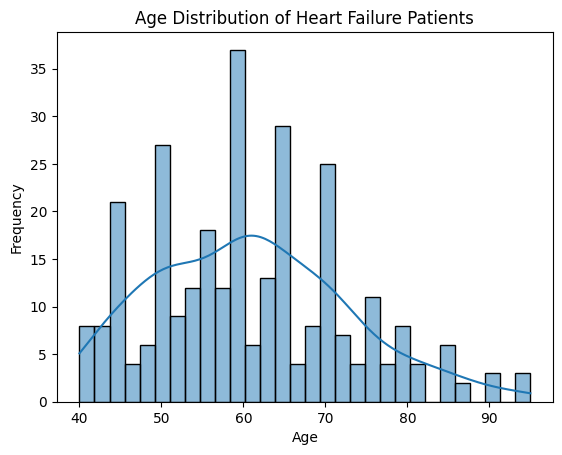

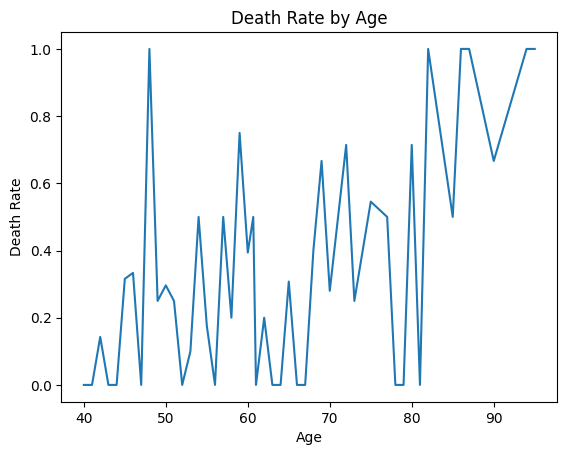

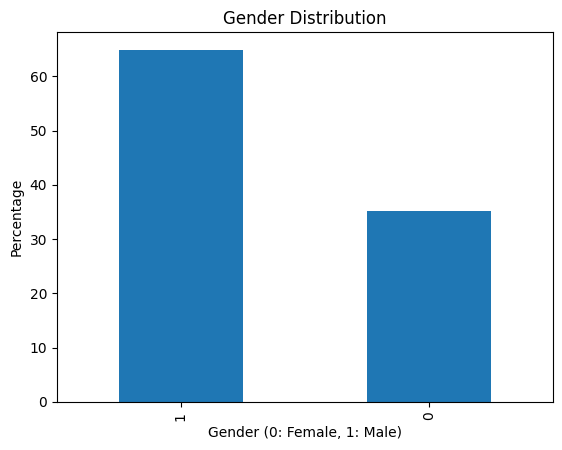

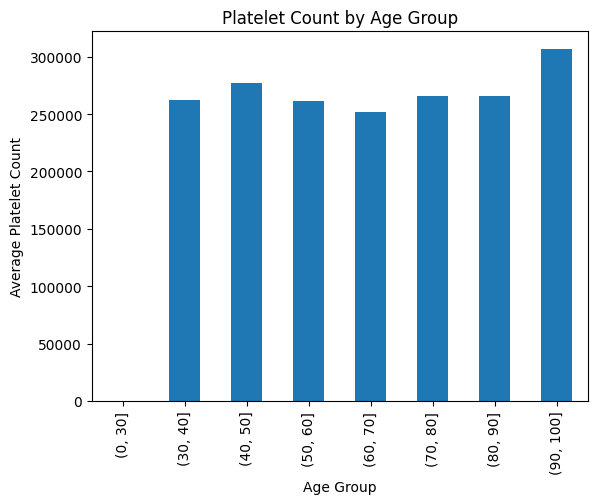

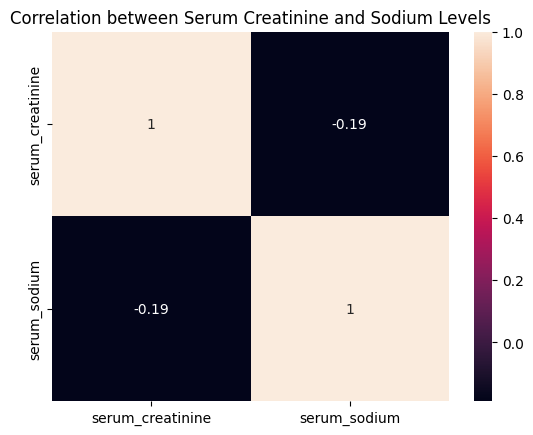

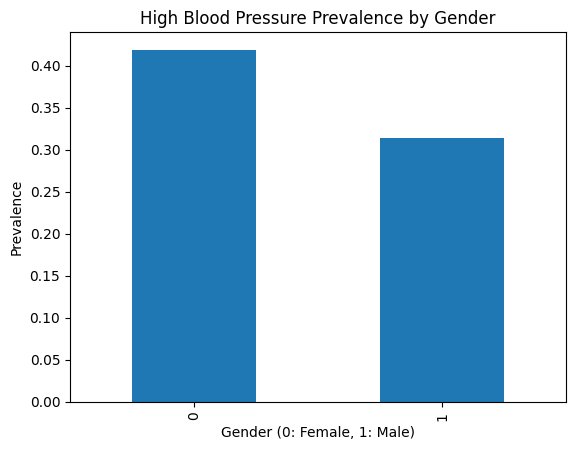

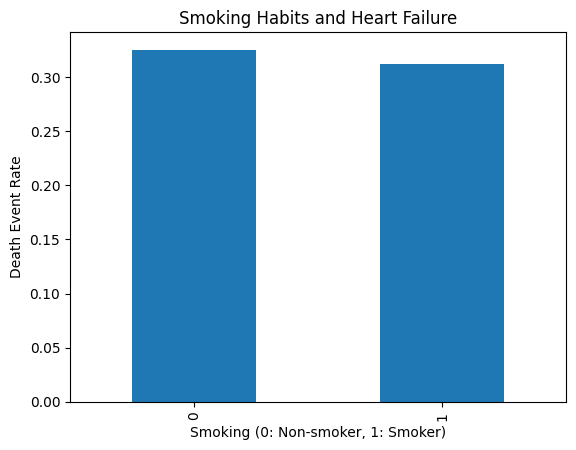

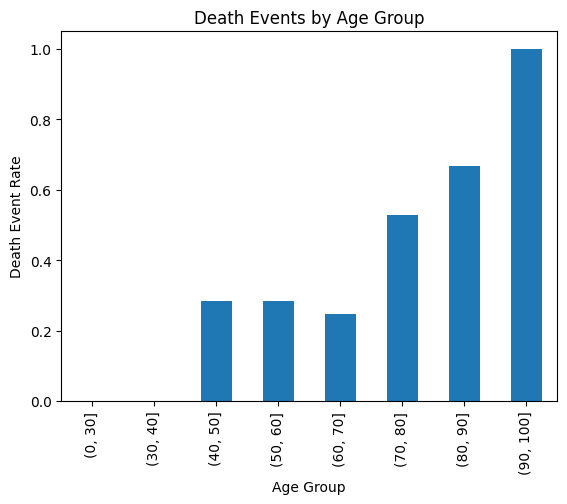

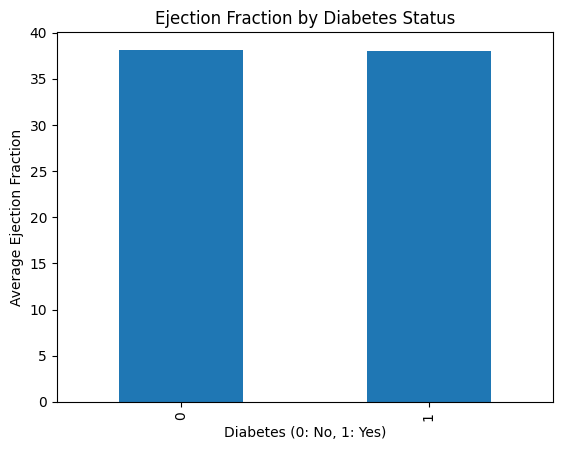

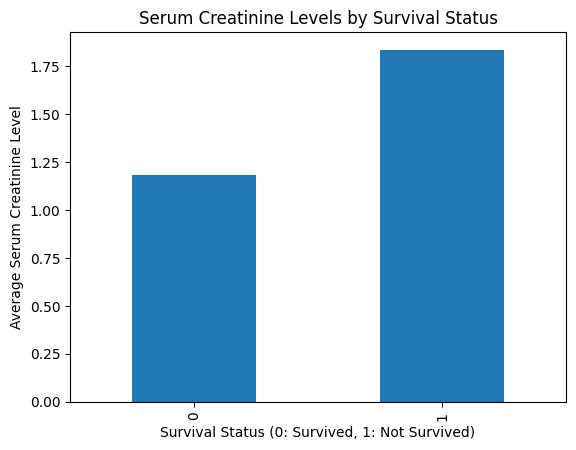

In [19]:
# 10. Serum creatinine level variation between survivors and non-survivors
creatinine_survival = df.groupby('DEATH_EVENT')['serum_creatinine'].mean()

# Print the results
print(f"Distribution of age among heart failure patients:\n{age_distribution}\n")
print(f"Death rate variation with age:\n{age_death_rate}\n")
print(f"Percentage of male and female patients:\n{gender_counts}\n")
print(f"Platelet count variation among different age groups:\n{platelet_variation}\n")
print(f"Correlation between creatinine and sodium levels:\n{creatinine_sodium_corr}\n")
print(f"Prevalence of high blood pressure between genders:\n{hbp_gender}\n")
print(f"Relationship between smoking habits and heart failure:\n{smoking_heart_failure}\n")
print(f"Distribution of death events across different age groups:\n{death_age_groups}\n")
print(f"Difference in ejection fraction between patients with and without diabetes:\n{ejection_fraction_diabetes}\n")
print(f"Serum creatinine level variation between survivors and non-survivors:\n{creatinine_survival}\n")

# Visualizations
# Distribution of age
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Death rate by age
sns.lineplot(data=age_death_rate)
plt.title('Death Rate by Age')
plt.xlabel('Age')
plt.ylabel('Death Rate')
plt.show()

# Gender distribution
gender_counts.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Percentage')
plt.show()

# Platelet count by age group
platelet_variation.plot(kind='bar')
plt.title('Platelet Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Platelet Count')
plt.show()

# Correlation heatmap
sns.heatmap(creatinine_sodium_corr, annot=True)
plt.title('Correlation between Serum Creatinine and Sodium Levels')
plt.show()

# High blood pressure prevalence by gender
hbp_gender.plot(kind='bar')
plt.title('High Blood Pressure Prevalence by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Prevalence')
plt.show()

# Smoking and heart failure
smoking_heart_failure.plot(kind='bar')
plt.title('Smoking Habits and Heart Failure')
plt.xlabel('Smoking (0: Non-smoker, 1: Smoker)')
plt.ylabel('Death Event Rate')
plt.show()

# Death events by age group
death_age_groups.plot(kind='bar')
plt.title('Death Events by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Death Event Rate')
plt.show()

# Ejection fraction by diabetes status
ejection_fraction_diabetes.plot(kind='bar')
plt.title('Ejection Fraction by Diabetes Status')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Average Ejection Fraction')
plt.show()

# Serum creatinine levels by survival status
creatinine_survival.plot(kind='bar')
plt.title('Serum Creatinine Levels by Survival Status')
plt.xlabel('Survival Status (0: Survived, 1: Not Survived)')
plt.ylabel('Average Serum Creatinine Level')
plt.show()

10.	Serum creatinine level variation between survivors and non-survivors:
○	Non-survivors have higher average serum creatinine levels compared to survivors.
